In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smitg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smitg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('tweet_emotions.csv')

df = df[['sentiment', 'content']]
df = df.dropna()
df = df[df['sentiment'] != 'empty']

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_content'] = df['content'].apply(preprocess_text)

In [3]:
X = df['cleaned_content']
y = df['sentiment']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

C:\Users\smitg\AppData\Local\Temp\ipykernel_24548\4069540479.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, order = df['sentiment'].value_counts().index, palette='viridis')


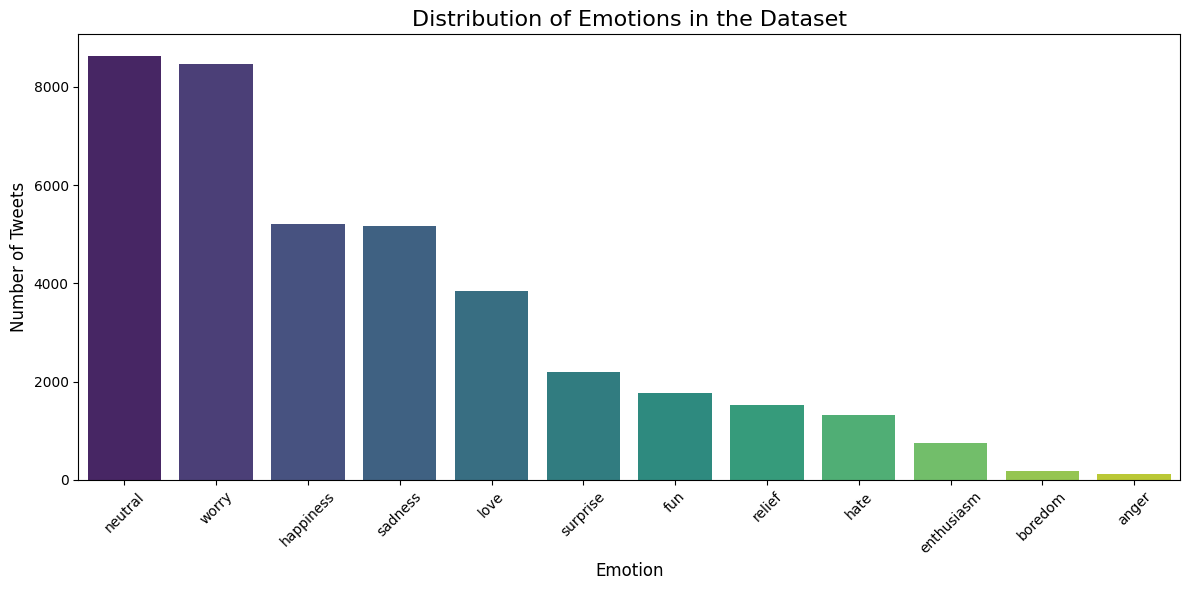

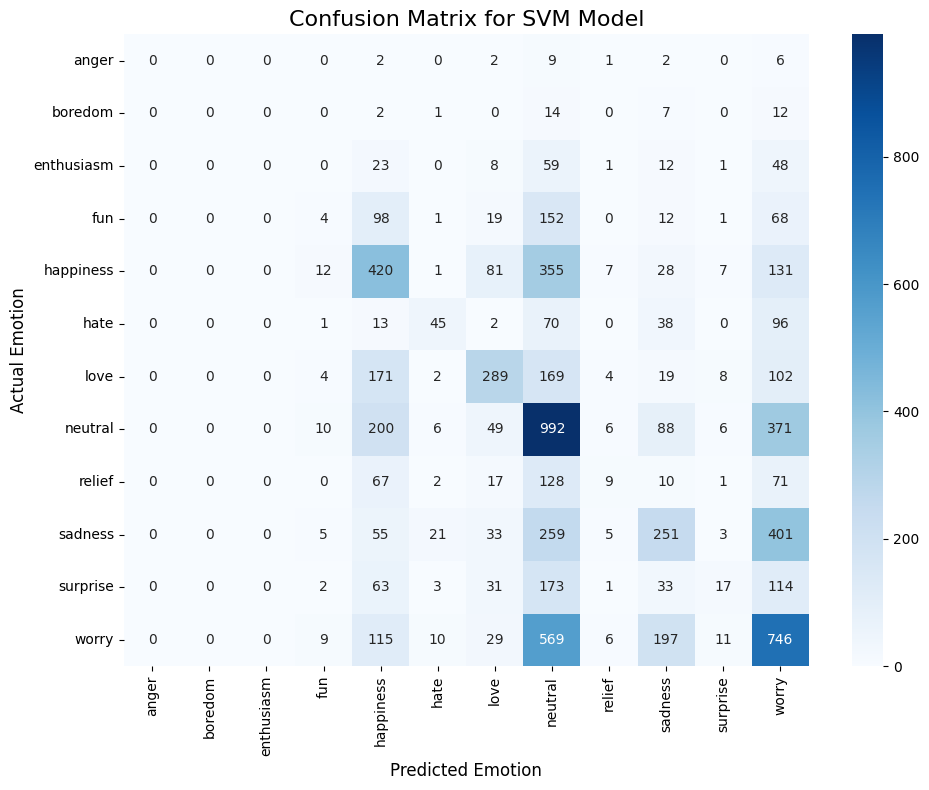


Deep learning 'history' object not found. Please train the Bi-LSTM model to see the training curves.


In [11]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
"""
# Plot 1: Class Distribution
try:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='sentiment', data=df, order = df['sentiment'].value_counts().index, palette='viridis')
    plt.title('Distribution of Emotions in the Dataset', fontsize=16)
    plt.ylabel('Number of Tweets', fontsize=12)
    plt.xlabel('Emotion', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except NameError:
    print("DataFrame 'df' not found. Please run the data loading cells.")


# Plot 2: Confusion Matrix for SVM Model
try:
    y_pred = svm_model.predict(X_test_tfidf)
    class_labels = svm_model.classes_
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix for SVM Model', fontsize=16)
    plt.xlabel('Predicted Emotion', fontsize=12)
    plt.ylabel('Actual Emotion', fontsize=12)
    plt.tight_layout()
    plt.show()
except NameError:
    print("\nSVM model outputs ('svm_model', 'y_test', etc.) not found. Please train the SVM model to see the confusion matrix.")


# Plot 3: Training & Validation Curves for Deep Learning Model
try:
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training Accuracy')
    plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training Loss')
    plt.plot(history_df['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
except NameError:
    print("\nDeep learning 'history' object not found. Please train the Bi-LSTM model to see the training curves.")

In [7]:
y_pred = svm_model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        22
     boredom       0.00      0.00      0.00        36
  enthusiasm       0.00      0.00      0.00       152
         fun       0.09      0.01      0.02       355
   happiness       0.34      0.40      0.37      1042
        hate       0.49      0.17      0.25       265
        love       0.52      0.38      0.44       768
     neutral       0.34      0.57      0.42      1728
      relief       0.23      0.03      0.05       305
     sadness       0.36      0.24      0.29      1033
    surprise       0.31      0.04      0.07       437
       worry       0.34      0.44      0.39      1692

    accuracy                           0.35      7835
   macro avg       0.25      0.19      0.19      7835
weighted avg       0.34      0.35      0.32      7835



c:\Users\smitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\smitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\smitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [12]:
def predict_emotion_svm(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = svm_model.predict(vectorized_text)
    return prediction[0]

# --- TEST YOUR SENTENCE HERE ---
my_sentence = "This was the most incredible and surprising news I have heard all year!"
predicted_emotion = predict_emotion_svm(my_sentence)

print(f"Sentence: '{my_sentence}'")
print(f"Predicted Emotion: {predicted_emotion}")

Sentence: 'This was the most incredible and surprising news I have heard all year!'
Predicted Emotion: surprise


In [13]:
import pickle

# Save the TF-IDF Vectorizer
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the trained SVM model
with open('svm_model.pickle', 'wb') as handle:
    pickle.dump(svm_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Vectorizer and SVM Model saved successfully!")

Vectorizer and SVM Model saved successfully!
